# Linear regression in python - intro

#### Importujemy biblioteki

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score

#### Na dobry początek wygenerujemy sobie idealny (prawie) dataset

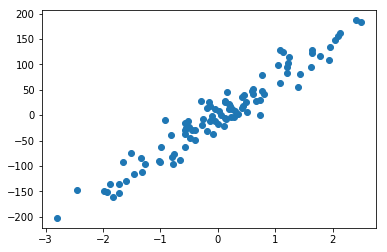

In [20]:
X, y = make_regression(n_samples=100, n_features=1, noise=20)
plt.scatter(X,y)
plt.show()

#### Teraz podzielimy dane na zbiór testowy i treningowy

In [21]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [40]:
regressor = LinearRegression()
regressor.fit(xTrain, yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
yPred = regressor.predict(xTest)

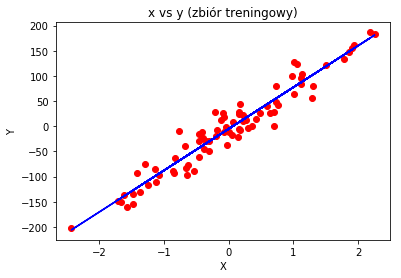

In [29]:
plt.scatter(xTrain, yTrain, color = 'red')
plt.plot(xTrain, regressor.predict(xTrain), color = 'blue')
plt.title('x vs y (zbiór treningowy)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

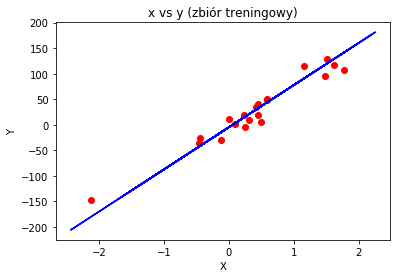

In [30]:
plt.scatter(xTest, yTest, color = 'red')
plt.plot(xTrain, regressor.predict(xTrain), color = 'blue')
plt.title('x vs y (zbiór treningowy)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#### Teraz wytrenujemy model na fajniejszych danych z prawdziwego świata 
#### Najpierw załadujemy nasze dane

In [89]:
diabetes = datasets.load_diabetes()

#### Wybieramy tylko jedną kolumnę jako feature (simple linear regression)

In [90]:
diabetes_X = diabetes.data[:, np.newaxis, 2]

#### Dzielimy nasz zbiór na dane testowe i treningowe

In [91]:
msk = np.random.rand(len(diabetes_X)) < 0.8
diabetes_X_train = diabetes_X[msk]
diabetes_X_test = diabetes_X[~msk]
diabetes_y_train = diabetes.target[msk]
diabetes_y_test = diabetes.target[~msk]

#### Tworzymy nasz regressor

In [92]:
regressor = linear_model.LinearRegression()

#### Po czym trenujemy model

In [93]:
regressor.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### W tym miejcu zachodzi predykcja

In [94]:
diabetes_y_pred = regressor.predict(diabetes_X_test)

#### Warto spojrzeć (a nawet trzeba!) parametry naszego modelu

In [95]:
# The coefficients
print('Coefficients: \n', regressor.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [962.17054496]
Mean squared error: 3787.65
Variance score: 0.32


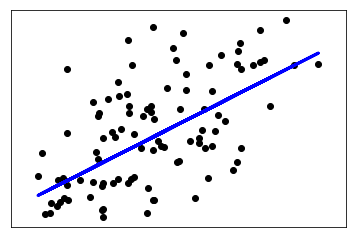

In [96]:
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

#### Multiple linear regression

#### Importujemy dataset

In [103]:
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

#### Dodajemy nasze dummy variables (przy okazji usuwając jedną z nich)

In [104]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()

# Dummy variable trap
X = X[:, 1:]

C:\Users\Zabor\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Zabor\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


#### Dzielimy na zbiór treningowy i testowy

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Trenujemy nasz model

In [106]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Następnie dokonujemy predykcji

In [107]:
y_pred = regressor.predict(X_test)

#### Zawsze fajnie pokazać na koniec jakieś statystyki i wykresy :)

In [108]:
# The coefficients
print('Coefficients: \n', regressor.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_pred, y_test))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_pred, y_test))

Coefficients: 
 [-9.59284160e+02  6.99369053e+02  7.73467193e-01  3.28845975e-02
  3.66100259e-02]
Mean squared error: 83502864.03
Variance score: 0.93


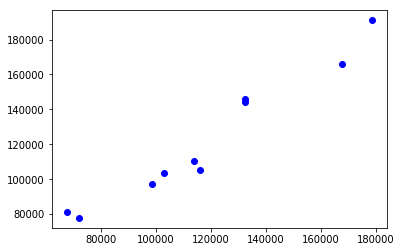

In [114]:
plt.scatter(y_pred, y_test,  color='blue')
plt.show()

#### Polynomial regression

#### Krótkie demo

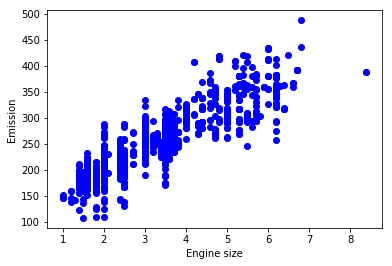

Coefficients:  [[ 0.         52.69828482 -1.8398116 ]]
Intercept:  [103.2371915]
Mean absolute error: 23.03
Residual sum of squares (MSE): 867.83
R2-score: 0.73


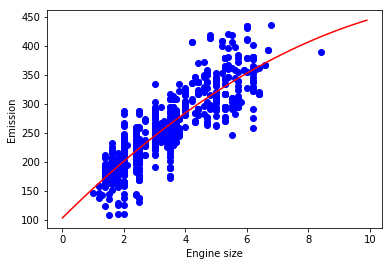

In [4]:
import urllib
downloaded_data  = urllib.request.urlopen('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv')

df = pd.read_csv(downloaded_data)
df.head(10)


cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)


plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)



plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")


from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )